# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [47]:
#your code here

diamonds = pd.read_csv("diamonds.csv")

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [48]:
#your code here
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [5]:
#your code here
"""""
Carat:
Diamond carat weight is the measurement of how much a diamond weighs. A metric “carat” is defined as 200 milligrams.
Each carat can be subdivided into 100 ‘points.’ This allows very precise measurements to the hundredth decimal place.

Cut:
A diamond cut is a style or design guide used when shaping a diamond for polishing such as the brilliant cut. 
Cut does not refer to shape (pear, oval), but the symmetry, proportioning and polish of a diamond. 
The cut of a diamond greatly affects a diamond's brilliance; this means if it is cut poorly, it will be less luminous.

Color:
Refers to a grading scale for diamonds in the normal color range used by internationally recognized laboratories (GIA & IGI for example). 
The scale ranges from D which is totally colorless to Z which is a pale yellow or brown color. 
Brown diamonds darker than K color are usually described using their letter grade, and a descriptive phrase, for example M Faint Brown. 
Diamonds with more depth of color than Z color fall into the fancy color diamond range.

Clarity:
Diamond clarity is the quality of diamonds that relates to the existence and visual appearance of internal characteristics of a diamond called inclusions, 
and surface defects, called blemishes. 
Clarity is one of the four Cs of diamond grading, the others being carat, color, and cut.

GIA diamond clarity grading scale
Category	Flawless	Internally Flawless	Very Very Slightly Included	Very Slightly Included	Slightly Included	Included
Grade	FL	IF	VVS1	VVS2	VS1	VS2	SI1	SI2	I1	I2	I3

Depth:
Depth of the diamond.

Table:


Price:
1 carat diamond prices range from $2,500 to $16,000 
and 2 carat diamond prices range from $7,700 to $72,000.
"""




'""\nCarat:\nDiamond carat weight is the measurement of how much a diamond weighs. A metric “carat” is defined as 200 milligrams.\nEach carat can be subdivided into 100 ‘points.’ This allows very precise measurements to the hundredth decimal place.\n\nCut:\nA diamond cut is a style or design guide used when shaping a diamond for polishing such as the brilliant cut. \nCut does not refer to shape (pear, oval), but the symmetry, proportioning and polish of a diamond. \nThe cut of a diamond greatly affects a diamond\'s brilliance; this means if it is cut poorly, it will be less luminous.\n\nColor:\nRefers to a grading scale for diamonds in the normal color range used by internationally recognized laboratories (GIA & IGI for example). \nThe scale ranges from D which is totally colorless to Z which is a pale yellow or brown color. \nBrown diamonds darker than K color are usually described using their letter grade, and a descriptive phrase, for example M Faint Brown. \nDiamonds with more dept

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [49]:
#your code here
diamonds.shape

# There are 53.940 rows and 11 columns.

(53940, 11)

The `clarity` column is confusing because we are not diamond experts. Let's modify this column with a new scale that is more understandable for us.

**Modify `clarity` column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [50]:
# Getting the unique values for clarity
diamonds["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [51]:
#your code here

diamonds["clarity"] = diamonds["clarity"].replace({'SI2': '1', 'SI1':'2', 'VS1':'3', 'VS2':'4', 'VVS2':'5', 'VVS1':'6', 'I1':'0', 'IF':'7'})
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,3,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,1,61.0,58.0,2757,6.15,6.12,3.74


It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [52]:
diamonds["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [53]:
#your code here
diamonds["color"] = diamonds["color"].replace({'D': '0', 'E':'1', 'F':'2', 'G':'3', 'H':'4', 'I':'5', 'J':'6'})
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,1,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,1,3,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,5,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,4,1,61.0,58.0,2757,6.15,6.12,3.74


With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [54]:
#your code here
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [55]:
diamonds.shape

# The info method is giving much more information than the shape.

(53940, 11)

In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [56]:
#your code here
diamonds.dtypes

# Since color and cut have been transformed to numbers it would be better to change them to integer numbers

diamonds_1 = diamonds.astype({'clarity': 'int64','color': 'int64'})
diamonds_1.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color           int64
clarity         int64
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [57]:
#your code and comments here
diamonds.describe()

# Standard deviation of especially the unnamed column and the price is very large.

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [58]:
#your code here

na_df = diamonds.isna().sum()
na_df

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [59]:
null_df = diamonds.isnull().sum()
null_df

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [60]:
filter = (diamonds['x'] == 0)|(diamonds['y'] == 0)|(diamonds['z'] == 0)
nullz_diamonds = diamonds[filter]
nullz_diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,3,1,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,4,0,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,3,1,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,2,1,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,3,0,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,2,1,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,4,4,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,3,4,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,3,3,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,4,1,59.4,61.0,12631,8.49,8.45,0.0


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [61]:
#your code here

#Depth_perc = 2 * z / (x + y) 
# z = d(x+y)/2

def calculate_z (x, y, d):
    z = d * (x + y)/2
    return z

**Apply it just to the rows with incorrect values**

In [40]:
#your code here
diamonds["z"]= [calculate_z(diamonds["x"],diamonds["y"],diamonds["depth"] if diamonds["z"] == 0 for row in diamonds["z"]]

SyntaxError: invalid syntax (<ipython-input-40-136b5a78f661>, line 3)

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [80]:
#your code here
# Changing the null values to NaN values.
diamonds["z"]= diamonds["z"].replace(to_replace={0}, value= "NaN", regex=True)
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,1,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,1,3,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,5,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,0,2,60.8,57.0,2757,5.75,5.76,3.5
53936,53937,0.72,Good,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,4,1,61.0,58.0,2757,6.15,6.12,3.74


Let's check the data again with the `describe()` method.

In [81]:
#your code here
diamonds.describe()

# The z column doesn´t come up anymore.

,Unnamed: 0,carat,depth,table,price,x,y
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000


The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [45]:
#your code here
na_df = diamonds.isna().sum()
na_df

# I don´t understand why no NaNs can be found.

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [65]:
#your code here
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000


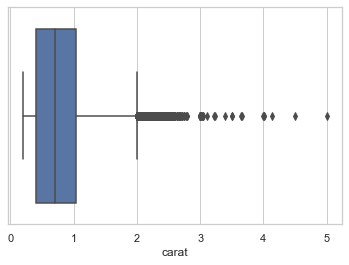

In [68]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=diamonds["carat"])

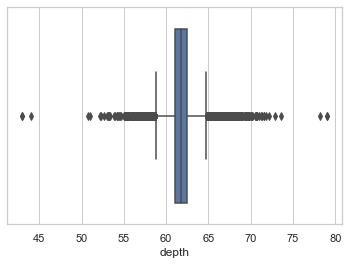

In [69]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diamonds["depth"])

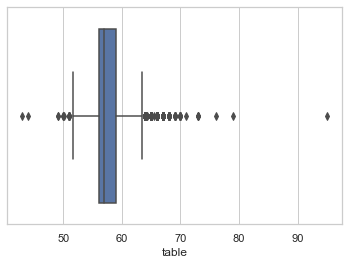

In [70]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diamonds["table"])

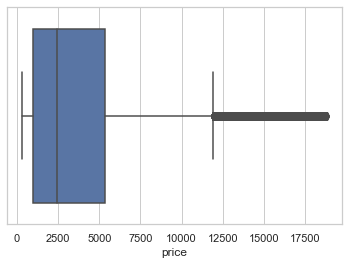

In [71]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=diamonds["price"])

In [ ]:
# your comments

# It can be seen that especially price and carat have many outliers.

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [73]:
diamonds.shape

(53940, 11)

In [72]:
#your code here
filt = diamonds["price"] > diamonds["price"].quantile(.75)
diamonds_outl = diamonds[filt]
diamonds_outl

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
12765,12766,1.07,Ideal,1,1,62.2,55.0,5325,6.54,6.58,4.08
12766,12767,1.11,Ideal,4,2,60.6,59.0,5325,6.75,6.71,4.08
12767,12768,1.14,Premium,3,2,62.2,58.0,5326,6.64,6.70,4.15
12768,12769,1.07,Premium,4,4,62.1,59.0,5327,6.52,6.56,4.06
12769,12770,1.33,Very Good,6,2,64.0,53.0,5327,6.93,7.01,4.46
...,...,...,...,...,...,...,...,...,...,...,...
27745,27746,2.00,Very Good,4,2,62.8,57.0,18803,7.95,8.00,5.01
27746,27747,2.07,Ideal,3,1,62.5,55.0,18804,8.20,8.13,5.11
27747,27748,1.51,Ideal,3,7,61.7,55.0,18806,7.37,7.41,4.56
27748,27749,2.00,Very Good,3,2,63.5,56.0,18818,7.90,7.97,5.04


Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

TypeError: unsupported operand type(s) for +: 'float' and 'str'

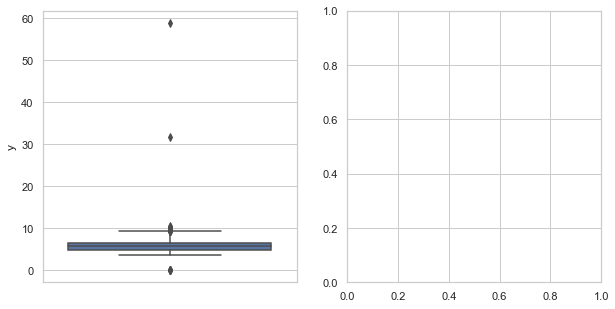

In [74]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values for z higher than 10 in it.


In [78]:
#your code here
filt_1 = (diamonds['z'] > 10)
tenz_diamonds = diamonds[filt_1]
tenz_diamonds

TypeError: '>' not supported between instances of 'str' and 'int'

Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [82]:
#your code here

# Replacing the value to 0:
diamonds["z"]= diamonds["z"].replace(to_replace={10}, value= 0, regex=True)

# Then applying the 
diamonds["z"]= [calculate_z(diamonds["x"],diamonds["y"],diamonds["depth"] if diamonds["z"] == 0 for row in diamonds["z"]]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,1,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,1,3,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,5,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,6,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,0,2,60.8,57.0,2757,5.75,5.76,3.5
53936,53937,0.72,Good,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,4,1,61.0,58.0,2757,6.15,6.12,3.74


Let's check if we actually corrected the outlier.

In [1]:
diamonds.loc[48410]

NameError: name 'diamonds' is not defined

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [76]:
#your code here
filt_2 = (diamonds['y'] > 10)
teny_diamonds = diamonds[filt_2]
teny_diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
24067,24068,2.00,Premium,4,1,58.9,57.0,12210,8.09,58.90,8.06
25998,25999,4.01,Premium,5,0,61.0,61.0,15223,10.14,10.10,6.17
27415,27416,5.01,Fair,6,0,65.5,59.0,18018,10.74,10.54,6.98
27630,27631,4.50,Fair,6,0,65.8,58.0,18531,10.23,10.16,6.72
49189,49190,0.51,Ideal,1,3,61.8,55.0,2075,5.15,31.80,5.12


We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [2]:
# Depth_perc = 2 * z / (x + y) 
# your code here

def calculate_y (x, z, d):
    y = (2*z - d*x)/ d
    return y

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows and comment what you see**

In [3]:
#your thoughts here
diamonds["y"]= [calculate_y(diamonds["x"],diamonds["z"],diamonds["depth"] if diamonds["y"] > 10 for row in diamonds["y"]]
                            
# It is giving me an error.

SyntaxError: invalid syntax (<ipython-input-3-09fc72bc8ebc>, line 2)

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

TypeError: unsupported operand type(s) for +: 'float' and 'str'

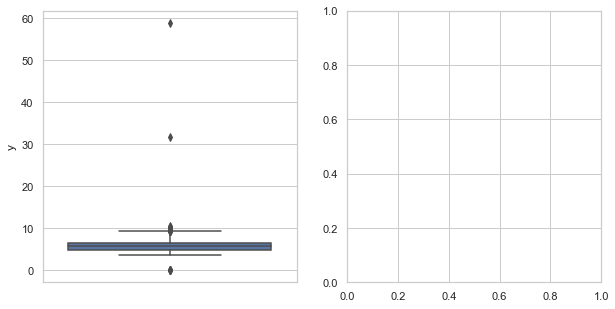

In [77]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [ ]:
#your thoughts here

# If my boxplot would have worked, the values were probably more reasonable.

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean.csv``**

In [ ]:
# your code here

# I couldn´t save the file, because there is an issue with the NaNs.
# If not, it would have been as below:

diamonds.to_csv('diamonds_clean.csv', index=False)